In [1014]:
import pandas as pd
import numpy as np

# importing pandas and numpy libraries

In [1015]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filepath) 

In [1016]:
df.to_string()

'     3    ?    alfa-romero     gas    std   two  convertible  rwd  front   88.6  168.8  64.1  48.8  2548   dohc    four  130  mpfi  3.47  2.68    9.0  111  5000  21  27  13495\n0    3    ?    alfa-romero     gas    std   two  convertible  rwd  front   88.6  168.8  64.1  48.8  2548   dohc    four  130  mpfi  3.47  2.68   9.00  111  5000  21  27  16500\n1    1    ?    alfa-romero     gas    std   two    hatchback  rwd  front   94.5  171.2  65.5  52.4  2823   ohcv     six  152  mpfi  2.68  3.47   9.00  154  5000  19  26  16500\n2    2  164           audi     gas    std  four        sedan  fwd  front   99.8  176.6  66.2  54.3  2337    ohc    four  109  mpfi  3.19  3.40  10.00  102  5500  24  30  13950\n3    2  164           audi     gas    std  four        sedan  4wd  front   99.4  176.6  66.4  54.3  2824    ohc    five  136  mpfi  3.19  3.40   8.00  115  5500  18  22  17450\n4    2    ?           audi     gas    std   two        sedan  fwd  front   99.8  177.3  66.3  53.1  2507    ohc   

In [1017]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [1018]:
df.columns = headers

In [1019]:
print(df.to_string())

     symboling normalized-losses           make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price
0            3                 ?    alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68               9.00        111     5000        21           27  16500
1            1                 ?    alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68   3.47               9.00        154     5000        19           26  16500
2            2               164           audi       gas        std        

In [1020]:
# we can see that header is added

In [1021]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# IDENTIFYING THE MISSING VALUES

In [1022]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [1023]:
# 1. checking to see any abnormalities in the dataframe, we can see '?' characters

In [1024]:
print("The no.of occurence of '?' in the dataframe : \n" + str((df=='?').sum()))

The no.of occurence of '?' in the dataframe : 
symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [1025]:
# understanding the occurances of '?' in a data frame

In [1026]:
indexes_qsn = {}
print("row indexes of '?' in each column :")
for column in df.columns:
    indexes_qsn[column] = df.index[df[column]=='?']
for column,indexes in indexes_qsn.items():
    print(f"column '{column}': {indexes.tolist()}")

row indexes of '?' in each column :
column 'symboling': []
column 'normalized-losses': [0, 1, 4, 6, 8, 13, 14, 15, 16, 42, 43, 44, 45, 47, 48, 62, 65, 70, 72, 73, 74, 81, 82, 83, 108, 109, 112, 113, 123, 125, 126, 127, 128, 129, 130, 180, 188, 190, 191, 192]
column 'make': []
column 'fuel-type': []
column 'aspiration': []
column 'num-of-doors': [26, 62]
column 'body-style': []
column 'drive-wheels': []
column 'engine-location': []
column 'wheel-base': []
column 'length': []
column 'width': []
column 'height': []
column 'curb-weight': []
column 'engine-type': []
column 'num-of-cylinders': []
column 'engine-size': []
column 'fuel-system': []
column 'bore': [54, 55, 56, 57]
column 'stroke': [54, 55, 56, 57]
column 'compression-ratio': []
column 'horsepower': [129, 130]
column 'peak-rpm': [129, 130]
column 'city-mpg': []
column 'highway-mpg': []
column 'price': [8, 43, 44, 128]


In [1027]:
# loacting the missing values

In [1028]:
df.replace('?',np.nan,inplace = True)

In [1029]:
# replacing '?' with NaN (Not a Number)

In [1030]:
df.loc[26,"num-of-doors"]

nan

In [1031]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [1032]:
# '?' are replaced with NaN

In [1033]:
# 2. checking for further missing values

In [1034]:
print(" The no.of occurences of missing values in the dataframe : \n" + str(df.isnull().sum()))

 The no.of occurences of missing values in the dataframe : 
symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [1035]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1036]:
# we can see the following columns are having the missing values :
# normalized-losses    40
# num-of-doors          2
# bore                  4
# stroke                4
# horsepower            2
# peak-rpm              2
# price                 4

### for "normalised-losses" column - we use MEAN

In [1037]:
# calcuating mean of "normalised-losses" column to replace missing values in that column.

In [1038]:
avg_nl = df["normalized-losses"].astype("float").mean()
print(avg_nl)

122.0


In [1039]:
# we find the mean of "normalized-losses" column is 122.0

In [1040]:
# replacing missing values in "normalised-losses" column with mean of that column

In [1041]:
df["normalized-losses"].replace(np.nan,avg_nl,inplace = True)

In [1042]:
# checking if the "NaN" is replaced with the mean 122.0

In [1043]:
df.loc[190,"normalized-losses"]

122.0

### for "num-of-doors" column - we use MODE

In [1044]:
# calculating mode 

In [1045]:
mode_no_drs = df["num-of-doors"].mode()
print(mode_no_drs)

0    four
Name: num-of-doors, dtype: object


In [1046]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

In [1047]:
# we find that "four" is the mode and its index is 0

In [1048]:
# replacing missing values with mode = "four"

In [1049]:
df["num-of-doors"].replace(np.nan,mode_no_drs[0],inplace = True)

In [1050]:
df.loc[26,"num-of-doors"]

'four'

### for "bore" column - we use MEAN

In [1051]:
# calculating mean for "bore" column

In [1052]:
avg_bore = df["bore"].astype(float).mean().round(2)
print(avg_bore)

3.33


In [1053]:
# replacing the missing values in the "bore" column with mean = 3.33

In [1054]:
df["bore"].replace(np.nan,avg_bore,inplace= True)

In [1055]:
# checking if the missing value is replaced with mean = 3.33

In [1056]:
df.loc[55,"bore"]

3.33

In [1057]:
# we can see that the missing value is replaced with mean

### for "stroke" column -  we use MEAN

In [1058]:
# calcuating mean for "stroke" column

In [1059]:
avg_stroke = df["stroke"].astype(float).mean().round(2)
print(avg_stroke)

3.26


In [1060]:
# replacing the missing values in the "stroke" column with mean = 3.26

In [1061]:
df["stroke"].replace(np.nan,avg_stroke,inplace= True)

In [1062]:
# checking if the missing value is replaced with 3.26

In [1063]:
df.loc[55,"stroke"]

3.26

In [1064]:
### for "horsepower" column - we use MEAN

In [1065]:
# calculating mean for "horsepower", be reminded that 

In [1066]:
avg_hp = df["horsepower"].astype(float).mean().round()
print(avg_hp)

104.0


In [1067]:
# replacing missing values with mean = 104

In [1068]:
df["horsepower"].replace(np.nan,avg_hp,inplace=True)

In [1069]:
# checking if the missing value is replaced with mean = 104

In [1070]:
df.loc[129,"horsepower"]

104.0

### for "peak-rpm" column - we use MEAN

In [1071]:
# calculating mean for "peak-rpm" column

In [1072]:
avg_rpm = df["peak-rpm"].astype(float).mean().round()
print(avg_rpm)

5126.0


In [1073]:
#replacing missing values in "peak-rpm" column with mean = 5126

In [1074]:
df["peak-rpm"].replace(np.nan,avg_rpm,inplace = True)

In [1075]:
# checking if missing value is replaced with mean = 5126

In [1076]:
df.loc[129,"peak-rpm"]

5126.0

### for "price" column - we are dropping the 4 rows

In [1077]:
df.dropna(subset = "price", axis= 0, inplace =True)

In [1078]:
#checking if the 4 rows are dropped , for which indices are 8,43,44,128

In [1079]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [1080]:
# we can see that row with index 8 has been missing, so we can confirm that rows with null values from "price" column are dropped

In [1081]:
# re-assigning the indices

In [1082]:
df.reset_index(drop=True,inplace=True)

In [1083]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [1084]:
# we can see that indices are re-arranged

In [1085]:
#lets check if there are any missing values further

In [1086]:
print("The no.of occurence of missing values in dataframe: \n" + str(df.isnull().sum()))

The no.of occurence of missing values in dataframe: 
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


# DATA FORMATTING

In [1087]:
# understanding the datatype of all the columns in dataframe

In [1088]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [1089]:
pd.set_option('display.max_columns', None)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [1090]:
# changing the datatype of the below columns

In [1091]:
df[["normalized-losses","horsepower","peak-rpm","price"]] = df[["normalized-losses","horsepower","peak-rpm","price"]].astype("int")

In [1092]:
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float")

In [1093]:
# checking if the datatypes are updated

In [1094]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

# DATA STANDARDIZATION

In [1095]:
# changing milegae units from mpg to kmpl

In [1096]:
df["city-mpg"] = (235/df["city-mpg"]).round()

In [1097]:
df["highway-mpg"] = (235/df["highway-mpg"]).round()

In [1098]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.0,9.0,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.0,9.0,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10.0,8.0,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.0,11.0,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12.0,9.0,15250


In [1099]:
#renaming the columns from "mpg" into "kmpl"

In [1100]:
df.rename(columns = {"city-mpg":"city-kmpl","highway-mpg":"highway-kmpl"},inplace=True)

In [1101]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.0,9.0,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.0,9.0,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10.0,8.0,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.0,11.0,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12.0,9.0,15250


In [1102]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-kmpl            float64
highway-kmpl         float64
price                  int32
dtype: object

In [1103]:
# changing the datatype from float into integer

In [1104]:
df[["city-kmpl","highway-kmpl"]] = df[["city-kmpl","highway-kmpl"]].astype("int32")

In [1105]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-kmpl              int32
highway-kmpl           int32
price                  int32
dtype: object

# DATA NORMALIZATION

In [1106]:
# using simple feature scaling method forcolumns "length", "width", "height"

In [1107]:
df["length"] = (df["length"]/df["length"].max()).round(1)

In [1108]:
df["width"] = (df["width"]/df["width"].max()).round(1)

In [1109]:
df["height"] = (df["height"]/df["height"].max()).round(1)

In [1110]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.8,0.9,0.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11,9,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.8,0.9,0.9,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12,9,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.8,0.9,0.9,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10,8,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.8,0.9,0.9,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13,11,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,0.9,0.9,0.9,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,15250


# DATA BINNING

In [1111]:
# starting with data binning, lets see the spread of the count of the "horsepower" as range

Text(0.5, 1.0, 'horsepower bins')

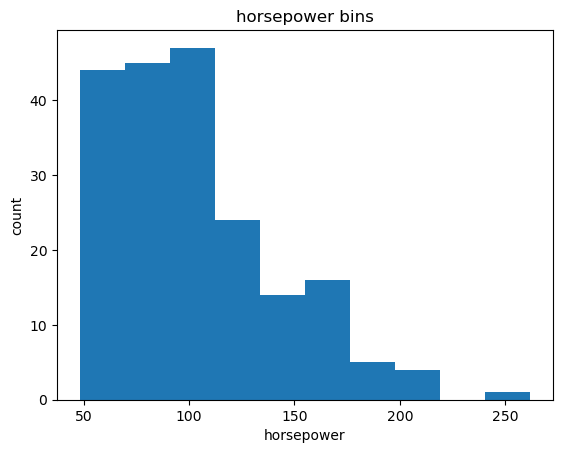

In [1112]:
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [1113]:
bins = np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)

In [1114]:
# ranging the variables from minimum value to maximum value and segmenting them into 3 (n) categories, hence binning n+1 = 4

In [1115]:
group_names=["low","medium","high"]

In [1116]:
# assigning names for the ranges

In [1117]:
df["horsepower-binned"]=pd.cut(df["horsepower"],bins=bins,labels=group_names,include_lowest=True)

In [1118]:
#  checking the binning

In [1119]:
df[["horsepower","horsepower-binned"]].head(5)

,horsepower,horsepower-binned
0,111,low
1,154,medium
2,102,low
3,115,low
4,110,low


In [1120]:
# lets see the count of cars in the segments of low, medium,high

In [1121]:
df["horsepower-binned"].value_counts()

horsepower-binned
low       152
medium     43
high        5
Name: count, dtype: int64

In [1122]:
# plotting distribution in each bin

Text(0.5, 1.0, 'horsepower bins')

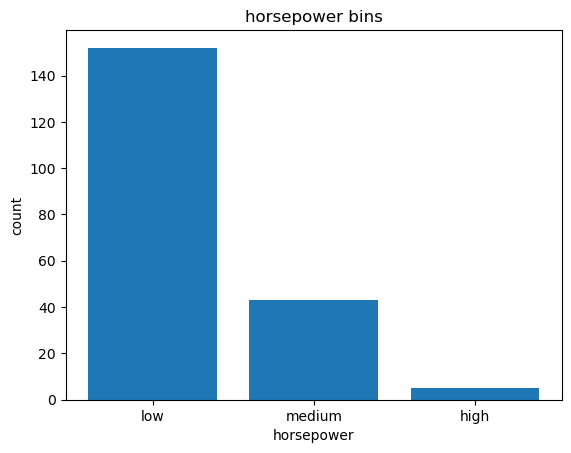

In [1123]:
pyplot.bar(group_names,df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [1124]:
# histogram vizualiztion for the bins and their distribution

Text(0.5, 1.0, 'horsepower bins')

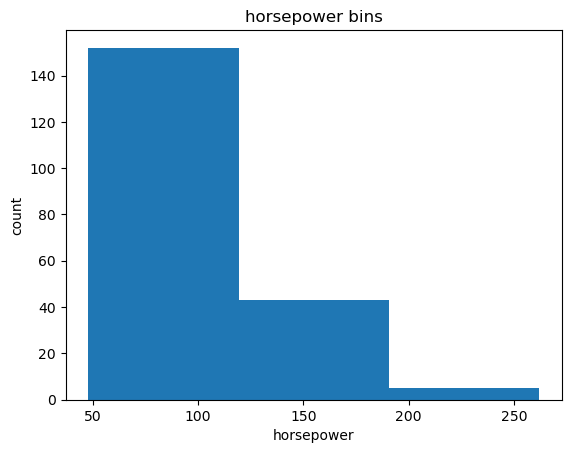

In [1125]:
plt.pyplot.hist(df["horsepower"],bins=3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### ASSIGNING DUMMY VARIABLE FOR CATEGORICAL VARIABLES

In [1126]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.8,0.9,0.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11,9,16500,low
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.8,0.9,0.9,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12,9,16500,medium
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.8,0.9,0.9,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10,8,13950,low


In [1127]:
## assigning dummy indicator for "fuel-type"

In [1128]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

In [1129]:
dummy_variable_1.head(3)

,diesel,gas
0,False,True
1,False,True
2,False,True


In [1130]:
dummy_variable_1.rename(columns={"gas":"fuel-type-gas","diesel":"fuel-type-diesel"},inplace=True)

In [1131]:
dummy_variable_1.head(2)

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True


In [1132]:
# merging the original dataframe with dummy variable dataframe

In [1133]:
df=pd.concat([df,dummy_variable_1],axis=1)

In [1134]:
# dropping the original existing "fuel-type" column from the dataframe

In [1135]:
df.drop("fuel-type",axis=1,inplace=True)

In [1136]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8,0.9,0.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11,9,16500,low,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8,0.9,0.9,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12,9,16500,medium,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.8,0.9,0.9,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10,8,13950,low,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.8,0.9,0.9,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13,11,17450,low,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.9,0.9,0.9,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,15250,low,False,True
5,1,158,audi,std,four,sedan,fwd,front,105.8,0.9,1.0,0.9,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,17710,low,False,True
6,1,122,audi,std,four,wagon,fwd,front,105.8,0.9,1.0,0.9,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,18920,low,False,True
7,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.9,1.0,0.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,14,12,23875,medium,False,True
8,2,192,bmw,std,two,sedan,rwd,front,101.2,0.8,0.9,0.9,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,10,8,16430,low,False,True
9,0,192,bmw,std,four,sedan,rwd,front,101.2,0.8,0.9,0.9,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,10,8,16925,low,False,True


In [1137]:
## assign dummies for "aspiration"

In [1138]:
dv_2 = pd.get_dummies(df["aspiration"])

In [1139]:
dv_2.head(2)

,std,turbo
0,True,False
1,True,False


In [1140]:
dv_2.rename(columns={"std":"aspiration_std","turbo":"aspiration-turbo"},inplace=True)

In [1141]:
dv_2.head(2)

,aspiration_std,aspiration-turbo
0,True,False
1,True,False


In [1142]:
df=pd.concat([df,dv_2],axis=1)

In [1143]:
df.drop("aspiration",axis=1,inplace=True)

In [1144]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.8,0.9,0.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11,9,16500,low,False,True,True,False
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.8,0.9,0.9,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12,9,16500,medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.8,0.9,0.9,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10,8,13950,low,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.8,0.9,0.9,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13,11,17450,low,False,True,True,False
4,2,122,audi,two,sedan,fwd,front,99.8,0.9,0.9,0.9,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,15250,low,False,True,True,False


# EXPLORATORY DATA ANALYSIS

### 1. Analyzing Individual Feature Patterns Using Visualization

In [1145]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm                int32
city-kmpl               int32
highway-kmpl            int32
price                   int32
horsepower-binned    category
fuel-type-diesel         bool
fuel-type-gas            bool
aspiration_std           bool
aspiration-turbo         bool
dtype: object

In [1146]:
df.dtypes.value_counts()

object      8
float64     7
int32       6
bool        4
int64       3
category    1
Name: count, dtype: int64

In [1147]:
filtered_Ctype = df.dtypes[df.dtypes.astype(str).isin(['object','category'])]
filtered_Ctype

make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
engine-type            object
num-of-cylinders       object
fuel-system            object
horsepower-binned    category
dtype: object

In [1148]:
filtered_Ctype.value_counts()

object      8
category    1
Name: count, dtype: int64

In [1149]:
filtered_Ntype = df.dtypes[df.dtypes.astype(str).isin(['int32','int64','float64'])]
filtered_Ntype

symboling              int64
normalized-losses      int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-kmpl              int32
highway-kmpl           int32
price                  int32
dtype: object

In [1150]:
filtered_Ntype.value_counts()

float64    7
int32      6
int64      3
Name: count, dtype: int64

## with Numerical variables

In [1151]:
# to find correlation between bore, srtoke, compression-ratio, horsepower

In [1152]:
df[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002021,0.566819
stroke,-0.051087,1.000000,0.186759,0.100899
compression-ratio,0.002021,0.186759,1.000000,-0.214260
horsepower,0.566819,0.100899,-0.214260,1.000000


In [1153]:
# we can see that bore and horsepower seems to have a positive correlation

In [1154]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 53340.77476433266)

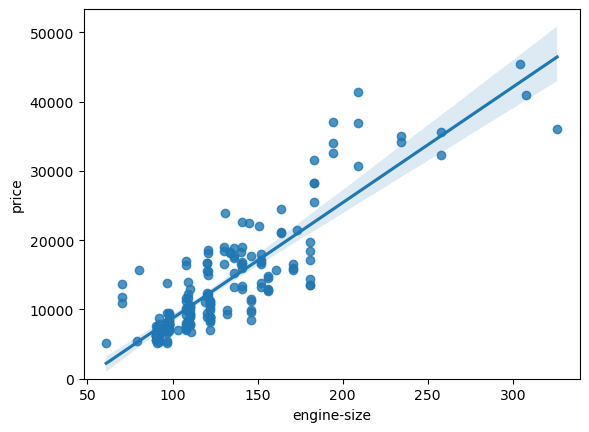

In [1155]:
sns.regplot(x="engine-size", y="price",data=df)
plt.ylim(0,)

In [1156]:
# it shows that engine size has good positive direct relation with price and acts as a price predictor

In [1157]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


In [1158]:
# we can see that the above variables are having good correlation

In [1159]:
#lets see for horsepower and price

(0.0, 47535.316180321046)

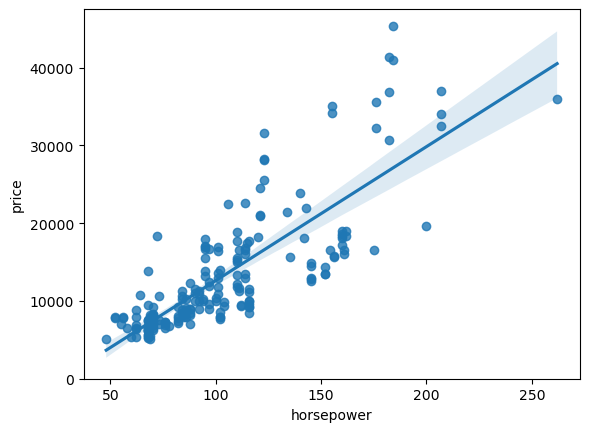

In [1160]:
sns.regplot(x="horsepower",y="price",data=df)
plt.ylim(0,)

In [1161]:
df[["horsepower","price"]].corr()

,horsepower,price
horsepower,1.000000,0.809657
price,0.809657,1.000000


In [1162]:
#lets see for peak-rpm and price

(0.0, 47414.1)

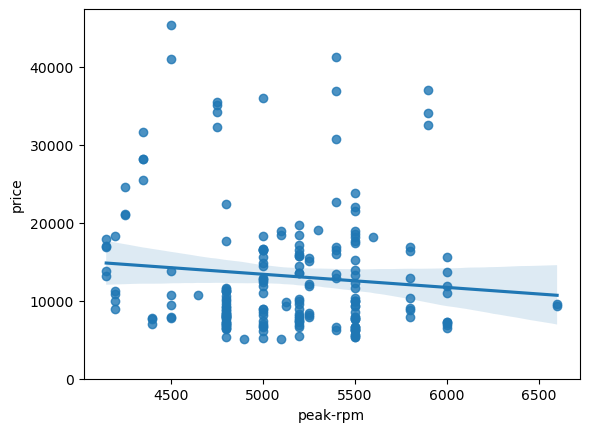

In [1163]:
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [1164]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


In [1165]:
# we can see a weak correlation between peak-rpm and price

In [1166]:
#lets see for highway-kmpl and price

(0.0, 47721.04808867924)

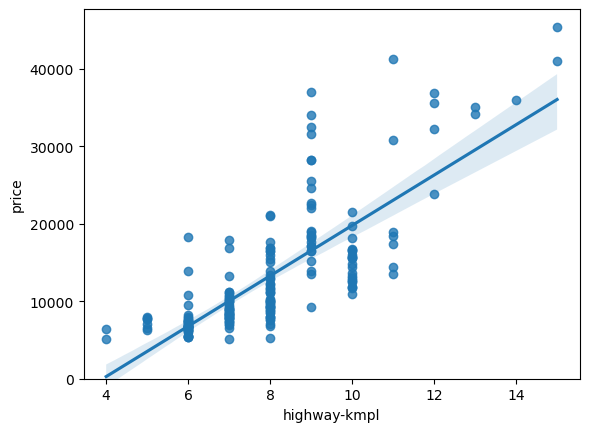

In [1167]:
sns.regplot(x="highway-kmpl",y="price",data=df)
plt.ylim(0,)

In [1168]:
df[["highway-kmpl","price"]].corr()

,highway-kmpl,price
highway-kmpl,1.000000,0.776926
price,0.776926,1.000000


In [1169]:
#lets see for city-kmpl and price

(0.0, 47722.26822800487)

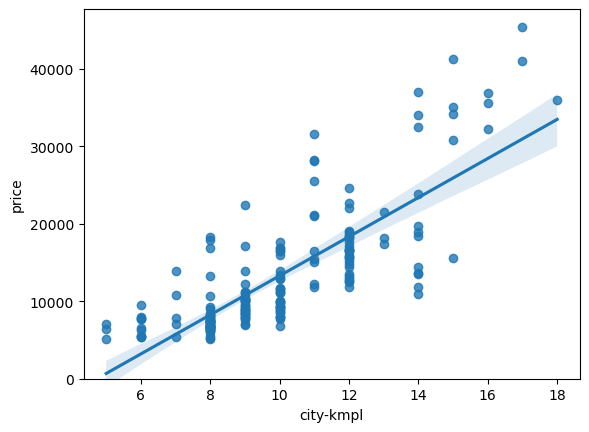

In [1170]:
sns.regplot(x="city-kmpl",y="price",data=df)
plt.ylim(0,)

In [1171]:
df[["city-kmpl","price"]].corr()

,city-kmpl,price
city-kmpl,1.000000,0.796627
price,0.796627,1.000000


In [1172]:
#lets see for stroke and price

(0.0, 47414.1)

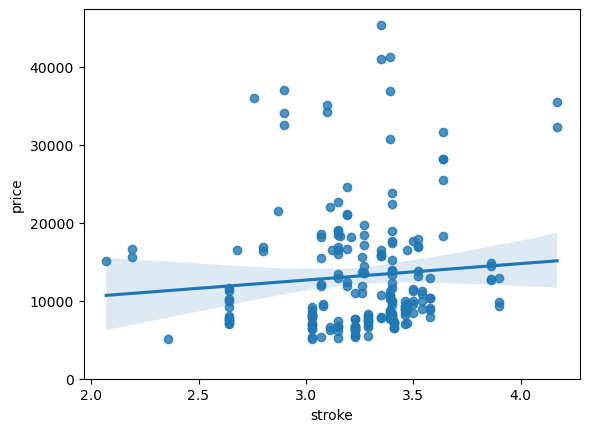

In [1173]:
sns.regplot(x="stroke",y="price",data=df)
plt.ylim(0,)

In [1174]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.083295
price,0.083295,1.000000


In [1175]:
# we can see a weak correlation between stroke and price

## with Categorical variables

<Axes: xlabel='body-style', ylabel='price'>

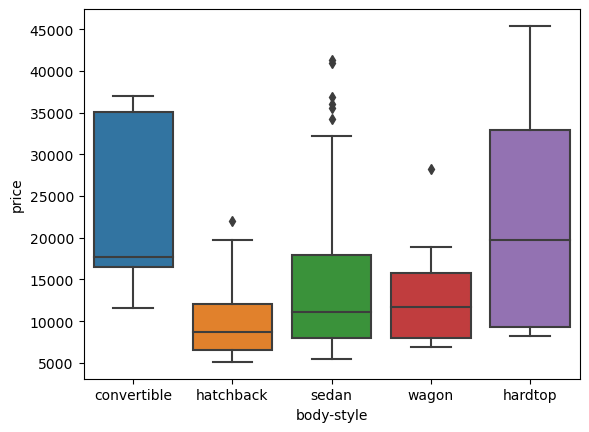

In [1176]:
sns.boxplot(x='body-style',y='price',data=df)

In [1177]:
#lets see for drive-wheels and price

<Axes: xlabel='drive-wheels', ylabel='price'>

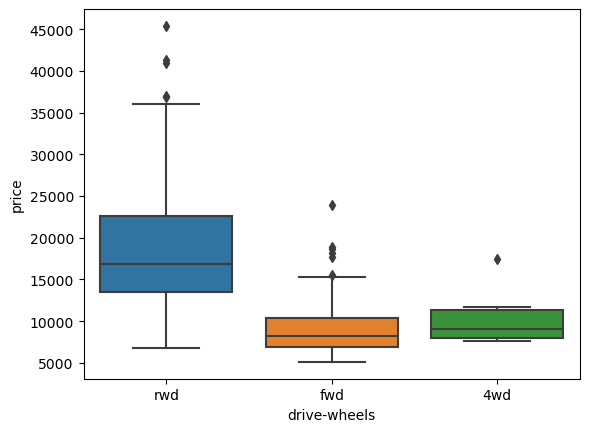

In [1178]:
sns.boxplot(x="drive-wheels",y="price",data=df)

In [1179]:
#lets see boxplot for engine-location and price

<Axes: xlabel='engine-location', ylabel='price'>

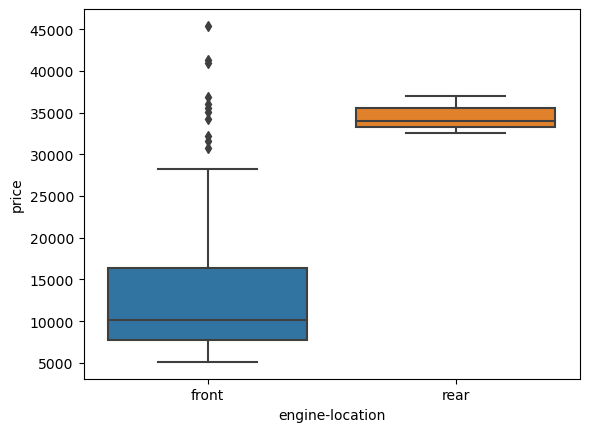

In [1180]:
sns.boxplot(x="engine-location",y="price",data=df)

In [1181]:
#lets see boxplot for engine-type and price

<Axes: xlabel='engine-type', ylabel='price'>

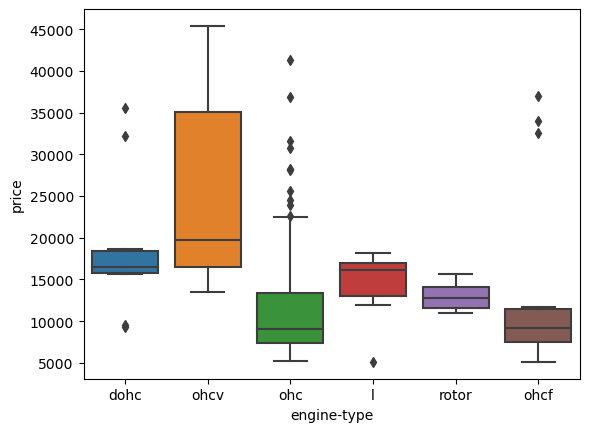

In [1182]:
sns.boxplot(x="engine-type",y="price",data=df)

In [1183]:
#lets see boxplot for num-of-cylinder and price

<Axes: xlabel='num-of-cylinders', ylabel='price'>

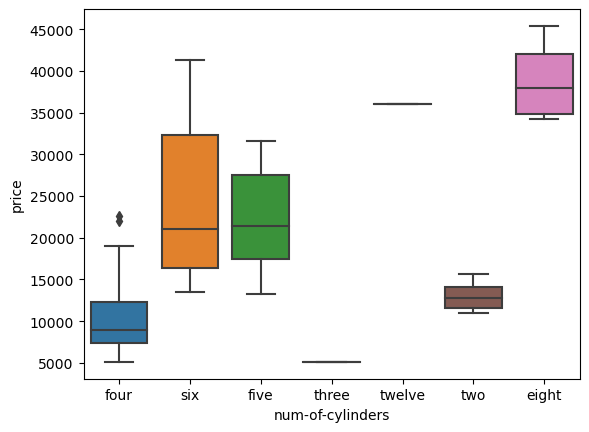

In [1184]:
sns.boxplot(x="num-of-cylinders",y="price",data=df)

In [1185]:
#lets see for fuel-system and price

<Axes: xlabel='fuel-system', ylabel='price'>

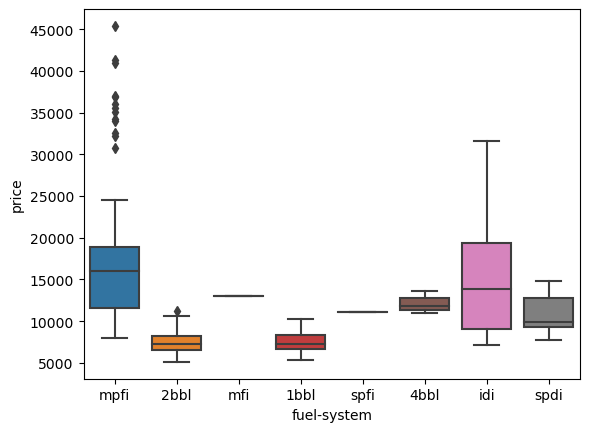

In [1186]:
sns.boxplot(x="fuel-system",y="price",data=df)

### 2. Descriptive Statistical Analysis

#### a) Describe() function

In [1187]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.834500,0.914500,0.88800,2555.705000,126.860000,3.330000,3.259850,10.170100,103.365000,5118.260000,9.965000,7.975000,13205.690000
std,1.248557,32.076542,6.038261,0.063084,0.036694,0.04866,518.594552,41.650501,0.268562,0.314177,4.014163,37.455525,479.240744,2.515035,1.903283,7966.982558
min,-2.000000,65.000000,86.600000,0.700000,0.800000,0.80000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5.000000,4.000000,5118.000000
25%,0.000000,100.250000,94.500000,0.800000,0.900000,0.90000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,8.000000,7.000000,7775.000000
50%,1.000000,122.000000,97.000000,0.800000,0.900000,0.90000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5163.000000,10.000000,8.000000,10270.000000
75%,2.000000,138.250000,102.400000,0.900000,0.900000,0.90000,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,12.000000,9.000000,16500.750000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.00000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.000000,15.000000,45400.000000


In [1188]:
#lets include object variables also

In [1189]:
df.describe(include=["object"])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,197,145,156,91


#### b) Value_counts() function

In [1190]:
#lets do value count for drive-wheels

In [1191]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [1192]:
#lets do value count for body-style

In [1193]:
body_style_counts = df['body-style'].value_counts().to_frame()
body_style_counts.rename(columns={'body-style':'value_counts'},inplace=True)
body_style_counts

,count
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,5


In [1194]:
#lets do value count for engine-location

In [1195]:
engine_location_counts=df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={"engine-location":"value_counts"},inplace=True)
engine_location_counts

,count
engine-location,
front,197
rear,3


In [1196]:
#lets do value count for engine-type

In [1197]:
engine_type_counts=df['engine-type'].value_counts().to_frame()
engine_type_counts.rename(columns={'engine-type':'value_counts'},inplace=True)
engine_type_counts

,count
engine-type,
ohc,145
ohcf,15
ohcv,13
l,12
dohc,11
rotor,4


In [1198]:
#lets do value count for num-of-cylinders

In [1199]:
num_of_cylinders_counts = df['num-of-cylinders'].value_counts().to_frame()
num_of_cylinders_counts.rename(columns={'num-of_cylinders':'value_counts'},inplace=True)
num_of_cylinders_counts

,count
num-of-cylinders,
four,156
six,24
five,10
two,4
eight,4
three,1
twelve,1


In [1200]:
#lets do value count for fuel-system

In [1201]:
fuel_system_counts = df['fuel-system'].value_counts().to_frame()
fuel_system_counts.rename(columns={'fuel-system':'value_counts'},inplace=True)
fuel_system_counts

,count
fuel-system,
mpfi,91
2bbl,64
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


#### c) Groupby() method

In [1202]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [1203]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [1204]:
df_pivot=df_group_one.pivot(index='drive-wheels',columns='body-style')
df_pivot=df_pivot.fillna(0)
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

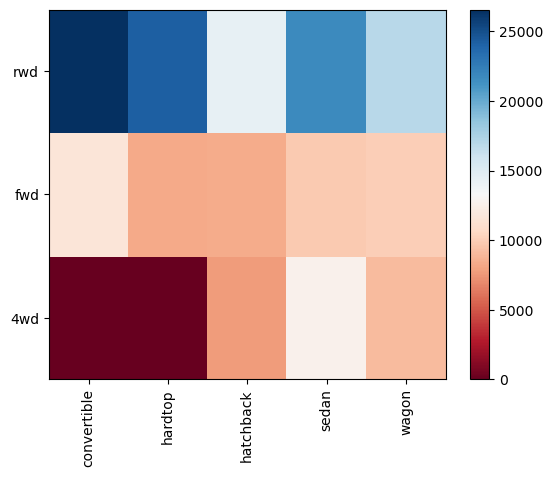

In [1205]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [1206]:
df_test2=df[['body-style','price']]
df_grp2=df_test2.groupby(['body-style'],as_index=False).mean()
df_grp2

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [1207]:
# we can see that "convertible" body-style has highest avg.price

In [1208]:
#lets check for num_of_cylinders

In [1209]:
df_test3=df[['num-of-cylinders','price']]
df_grp3=df_test3.groupby(['num-of-cylinders'],as_index=False).mean()
df_grp3

,num-of-cylinders,price
0,eight,38900.000000
1,five,22007.600000
2,four,10282.737179
3,six,23671.833333
4,three,5151.000000
5,twelve,36000.000000
6,two,13020.000000


In [1210]:
# we can see that as no.of cylinders increases the price increases, and the cars with 8 cylinders have the highest price

In [1211]:
#lets check for fuel-system

In [1212]:
df_test4=df[['fuel-system','price']]
df_grp4=df_test4.groupby(['fuel-system'],as_index=False).mean()
df_grp4

,fuel-system,price
0,1bbl,7555.545455
1,2bbl,7433.203125
2,4bbl,12145.000000
3,idi,15838.150000
4,mfi,12964.000000
5,mpfi,17650.307692
6,spdi,10990.444444
7,spfi,11048.000000


In [1213]:
# we can see that 1bbl have highest avg.price

## Pearson correlation and P-value

In [1214]:
#lets check correlation between wheel-base and price

In [1215]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.457019502050271e-20


In [1216]:
#linear relation isnt strong but correlation is signficiant

In [1217]:
#lets check correlation between horsepower and price

In [1218]:
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8096565575365611  with a P-value of P = 1.0468839625926889e-47


In [1219]:
#linear relation is significiant strong and as correlation

In [1220]:
#lets check correlation between length and price

In [1221]:
pearson_coef,p_value= stats.pearsonr(df['length'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.6167919808532225 with p_value of p = 2.378138985841883e-22


In [1222]:
#linear relation isnt strong but correlation is signficiant

In [1223]:
#lets check correlation between width and price

In [1224]:
pearson_coef,p_value= stats.pearsonr(df['width'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.5791775480762448 with p_value of p = 2.6091707881189077e-19


In [1225]:
#linear relation isnt strong but correlation is signficiant

In [1226]:
#lets check correlation between curb-weight and price

In [1227]:
pearson_coef,p_value= stats.pearsonr(df['curb-weight'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.8344204348498461 with p_value of p = 3.969977536021817e-53


In [1228]:
#linear relation is significiant strong and as correlation

In [1229]:
#lets check correlation between engine-size and price

In [1230]:
pearson_coef,p_value= stats.pearsonr(df['engine-size'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.8723367498521142 with p_value of p = 1.8977171466561833e-63


In [1231]:
#linear relation is significiant strong and as correlation

In [1232]:
#lets check correlation between bore and price

In [1233]:
pearson_coef,p_value= stats.pearsonr(df['bore'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.5434310033088074 with p_value of p = 9.209749630850712e-17


In [1234]:
#linear relation isnt strong but correlation is signficiant

In [1235]:
#lets check correlation between city-kmpl and price

In [1236]:
pearson_coef,p_value= stats.pearsonr(df['city-kmpl'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.7966273815190126 with p_value of p = 3.654781176685478e-45


In [1237]:
#linear relation is significiant strong and as correlation

In [1238]:
#lets check correlation between highway-kmpl and price

In [1239]:
pearson_coef,p_value= stats.pearsonr(df['highway-kmpl'],df['price'])
print('The pearson correlation coefficient is',pearson_coef,'with p_value of p =',p_value)

The pearson correlation coefficient is 0.776926486323497 with p_value of p = 1.1882122324612203e-41


In [1240]:
#linear relation isnt strong but correlation is signficiant

In [1241]:
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.8,0.9,0.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11,9,16500,low,False,True,True,False
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.8,0.9,0.9,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12,9,16500,medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.8,0.9,0.9,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,10,8,13950,low,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.8,0.9,0.9,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13,11,17450,low,False,True,True,False
4,2,122,audi,two,sedan,fwd,front,99.8,0.9,0.9,0.9,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,15250,low,False,True,True,False
5,1,158,audi,four,sedan,fwd,front,105.8,0.9,1.0,0.9,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,17710,low,False,True,True,False
6,1,122,audi,four,wagon,fwd,front,105.8,0.9,1.0,0.9,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,12,9,18920,low,False,True,True,False
7,1,158,audi,four,sedan,fwd,front,105.8,0.9,1.0,0.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,14,12,23875,medium,False,True,False,True
8,2,192,bmw,two,sedan,rwd,front,101.2,0.8,0.9,0.9,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,10,8,16430,low,False,True,True,False
9,0,192,bmw,four,sedan,rwd,front,101.2,0.8,0.9,0.9,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,10,8,16925,low,False,True,True,False
